In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

#genre_df = Spotify Dataset 1921-2020, 160k+ Tracks


genre_df = pd.read_csv("../Datasets/data_by_genres.csv")
genre_df

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.166667,5,1
1,[],0.679245,0.521473,2.298526e+05,0.401522,0.196737,0.221586,-12.679076,0.112267,112.025168,0.515920,21.682005,7,1
2,a cappella,0.621532,0.577017,1.936522e+05,0.345694,0.003799,0.127087,-12.770211,0.095324,111.813230,0.453186,43.351819,11,1
3,abstract,0.359395,0.459500,3.430185e+05,0.487000,0.791400,0.119480,-14.092000,0.043420,124.743200,0.304990,41.500000,1,1
4,abstract beats,0.353347,0.694400,2.338244e+05,0.613400,0.349403,0.102453,-6.699800,0.143453,119.398400,0.634187,58.600000,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2659,zolo,0.218600,0.560365,2.675453e+05,0.611985,0.152665,0.190792,-11.499268,0.064295,123.283566,0.596705,33.760410,9,1
2660,zouglou,0.124000,0.834000,2.951470e+05,0.674000,0.000000,0.082800,-13.455000,0.072100,119.039000,0.951000,56.000000,7,0
2661,zouk,0.233181,0.752762,2.951100e+05,0.627238,0.301195,0.083224,-10.864476,0.038110,101.681762,0.844381,42.476190,4,1
2662,zouk riddim,0.052700,0.776000,2.293330e+05,0.656000,0.565000,0.044500,-14.316000,0.034100,99.981000,0.966000,24.000000,4,1


In [2]:
genre_df["genres"].unique()

array(['432hz', '[]', 'a cappella', ..., 'zouk', 'zouk riddim', 'zydeco'],
      dtype=object)

In [3]:
#Demostrar el grado de valence en los Top 100 de géneros populares

genres_popularity=genre_df[["genres","popularity","valence"]]
genres_popularity=genres_popularity.sort_values(by="popularity", ascending=False)
genres_popularity.head(100)

,genres,popularity,valence
512,circuit,82.000000,0.556000
1118,guaracha,82.000000,0.556000
2141,russian dance,79.000000,0.326000
34,afroswing,77.625000,0.701125
2104,ritmo kombina,77.333333,0.505333
...,...,...,...
1419,k-pop girl group,63.675769,0.674597
2511,uk hip hop,63.544762,0.528890
2377,swedish tropical house,63.500000,0.223500
2384,swiss pop,63.500000,0.492500


In [4]:
genres_energy=genre_df[["genres","energy","danceability","loudness","popularity","valence"]]
genres_energy=genres_energy.sort_values(by="energy", ascending=False)
genres_energy.head(100)

,genres,energy,danceability,loudness,popularity,valence
1799,norwegian death metal,0.999500,0.204000,-5.127500,41.000000,0.027850
251,black 'n' roll,0.999500,0.204000,-5.127500,41.000000,0.027850
255,blackened crust,0.999500,0.204000,-5.127500,41.000000,0.027850
156,australian ska,0.994667,0.312667,-4.356000,44.333333,0.228900
2423,tennessee metal,0.994333,0.372000,-4.621000,46.000000,0.105967
...,...,...,...,...,...,...
1537,manchester indie,0.920000,0.402000,-2.944000,44.000000,0.297000
1849,okinawan pop,0.919500,0.481000,-3.761000,59.250000,0.633500
1504,liverpool indie,0.919000,0.429071,-5.046714,52.285714,0.574571
865,easycore,0.918714,0.549819,-3.988851,46.206494,0.565258


In [5]:
genre = []
valence = 0
popularity = 0
loudness = 0
danceability = 0
energy = 0
valences = []
popularities = []
loudnesses = []
danceabilities = []
energies = []
countries =["mexican", "australian", "argentine", "colombian", "chile", "japan", "chinese", "spanish", "canadian",
            "american", "french", "german", "russia", "indonesian", "indian", "south african", "nigerian",
           "belgian", "brazil", "british", "czech", "danish", "dutch", "greek", "icelandic", "israeli"]
for country in countries:
    for i in range(len(genres_energy["genres"])):
        if country in genres_energy["genres"][i]:
            genre.append(genres_energy["genres"][i])
            valence += genres_energy["valence"][i]
            popularity += genres_energy["popularity"][i]
            loudness += genres_energy["loudness"][i]
            danceability += genres_energy["danceability"][i]
            energy += genres_energy["energy"][i]
    popularities.append(popularity/len(genre))
    valences.append(valence/len(genre))
    loudnesses.append(loudness/len(genre))
    danceabilities.append(danceability/len(genre))
    energies.append(energy/len(genre))


In [12]:
countries_df = pd.DataFrame({"country": countries, "valence": valences, "popularity": popularities, "loudness": loudnesses,
                            "danceability": danceabilities, "energy": energies})
countries_df

,country,valence,popularity,loudness,danceability,energy
0,mexican,0.654865,43.723646,-9.533351,0.607258,0.571412
1,australian,0.553333,47.182220,-8.789137,0.568589,0.612060
2,argentine,0.552665,48.300370,-8.906935,0.577643,0.607922
3,colombian,0.580249,47.514584,-8.777791,0.589612,0.616911
4,chile,0.586239,47.866569,-8.672206,0.599598,0.613682
5,japan,0.564465,46.863352,-8.780045,0.564683,0.628826
6,chinese,0.535777,46.179930,-9.395783,0.552971,0.601100
7,spanish,0.536934,44.992632,-9.540664,0.551359,0.597286
8,canadian,0.516080,44.862705,-9.589121,0.542240,0.594845
9,american,0.507144,44.354185,-9.924788,0.535418,0.578607


In [13]:
countries_df.describe()

,valence,popularity,loudness,danceability,energy
count,26.000000,26.000000,26.000000,26.000000,26.000000
mean,0.516823,43.992696,-9.825386,0.546115,0.582119
std,0.042455,2.070467,0.584805,0.023535,0.019668
min,0.481371,41.667205,-10.388405,0.528793,0.560540
25%,0.490539,42.527331,-10.259792,0.531429,0.568380
50%,0.494064,43.117341,-10.143445,0.533607,0.572015
75%,0.536645,44.960150,-9.535179,0.552568,0.596676
max,0.654865,48.300370,-8.672206,0.607258,0.628826


In [21]:
def barPlot(y_axis,x_axis,name):
    x = np.arange(len(countries_df["country"]))
    plt.figure(figsize=(9,5))
    plt.bar(x_axis, y_axis)
    plt.xticks(x, x_axis, rotation = "vertical")
    plt.title(name + " per country")
    plt.xlabel("countries")
    plt.ylabel(name)
    if name == "valence":
        plt.hlines(0.536645,0,25, alpha = 0.5, color = "red")
        plt.annotate("Third quartile as valence threshold 0.536645",(10,0.55),fontsize=10,color="red")
    elif name == "popularity":
        plt.hlines(44.960150,0,25, alpha = 0.5, color = "red")
        plt.annotate("Third quartile as popularity threshold 44.960150",(10,46),fontsize=10,color="red")
    elif name == "loudness":
        plt.hlines(-9.535179,0,25, alpha = 0.5, color = "red")
        plt.annotate("Third quartile as popularity threshold -9.535179",(-1,-10.5),fontsize=10,color="red")
    elif name == "danceability":
        plt.hlines(0.552568,0,25, alpha = 0.5, color = "red")
        plt.annotate("Third quartile as Danceability threshold 0.552568",(10,0.57),fontsize=10,color="red")
    elif name == "energy":
        plt.hlines(0.596676,0,25, alpha = 0.5, color = "red")
        plt.annotate("Third quartile as Energy threshold 0.596676",(10,0.61),fontsize=10,color="red")
    plt.show()

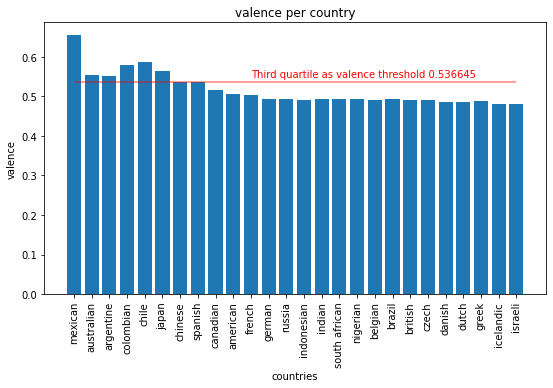

In [25]:
barPlot(countries_df["valence"],countries_df["country"],"valence")

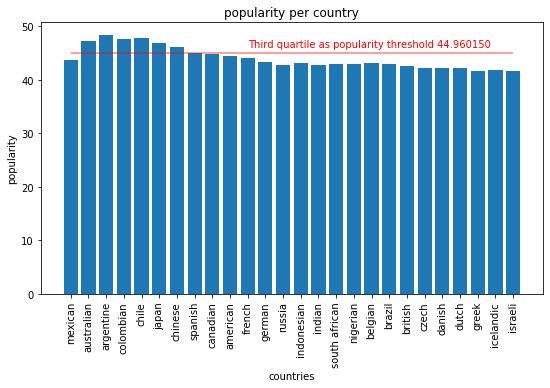

In [24]:
barPlot(countries_df["popularity"],countries_df["country"],"popularity")

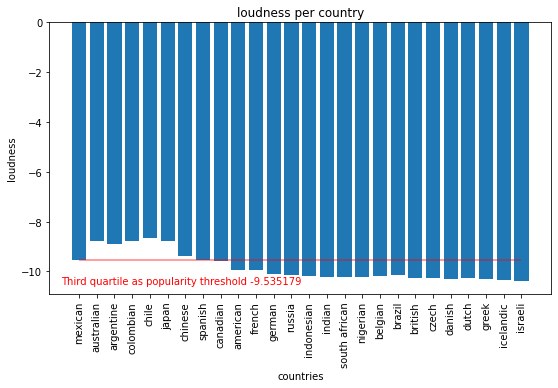

In [26]:
barPlot(countries_df["loudness"],countries_df["country"],"loudness")

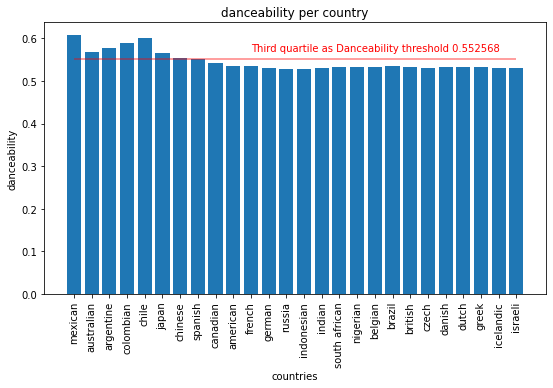

In [27]:
barPlot(countries_df["danceability"],countries_df["country"],"danceability")

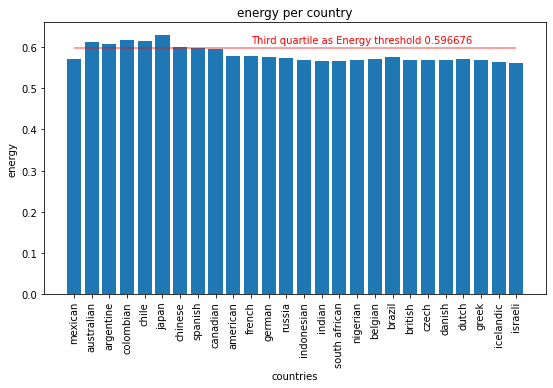

In [28]:
barPlot(countries_df["energy"],countries_df["country"],"energy")

In [29]:
#Integrate most popular music per country features (Danceability, Energy, Loudnes and Valence) based on Billboard's
#International charts from 2019-20, focused on the countries listed next.

#Set variables to scan through the csv files
countries = ["ARG","MEX","AUS", "CAN", "ESP", "FRA", "GBP", "GER", "ITA","SUI","EUR", "JPN", "KOR"]
col_list = ["danceability", "energy", "loudness", "valence"]
files_name=[]
by_nationality=[]

#Define a function to crawl the csv's and 
for x in countries:
    file=f'../Datasets/Billboard International Charts (2019-Aug 2020)/{x}.csv'
    if x=="ARG":        
        ar_con = ARG=by_nationality.append((pd.DataFrame(pd.read_csv(file,usecols=col_list)
                                   [col_list])).mean())
    elif x=="AUS":      
        au_con = AUS=by_nationality.append((pd.DataFrame(pd.read_csv(file,usecols=col_list)
                                   [col_list])).mean())
    elif x=="CAN":
        ca_con = CAN=by_nationality.append((pd.DataFrame(pd.read_csv(file,usecols=col_list)
                                   [col_list])).mean())
    elif x=="ESP":
        es_con = ESP=by_nationality.append((pd.DataFrame(pd.read_csv(file,usecols=col_list)
                                   [col_list])).mean())
    elif x=="EUR":
        eu_con = EUR=by_nationality.append((pd.DataFrame(pd.read_csv(file,usecols=col_list)
                                   [col_list])).mean())
    elif x=="FRA":
        fr_con = FRA=by_nationality.append((pd.DataFrame(pd.read_csv(file,usecols=col_list)
                                   [col_list])).mean())
    elif x=="GBP":
        gb_con = GBP=by_nationality.append((pd.DataFrame(pd.read_csv(file,usecols=col_list)
                                   [col_list])).mean())
    elif x=="GER":
        gr_con = GER=by_nationality.append((pd.DataFrame(pd.read_csv(file,usecols=col_list)
                                   [col_list])).mean())
    elif x=="ITA":
        it_con = ITA=by_nationality.append((pd.DataFrame(pd.read_csv(file,usecols=col_list)
                                   [col_list])).mean())
    elif x=="JPN":
        jp_con = JPN=by_nationality.append((pd.DataFrame(pd.read_csv(file,usecols=col_list)
                                   [col_list])).mean())
    elif x=="KOR":
        ko_con = KOR=by_nationality.append((pd.DataFrame(pd.read_csv(file,usecols=col_list)
                                   [col_list])).mean())
    elif x=="MEX":
        mx_con = MEX=by_nationality.append((pd.DataFrame(pd.read_csv(file,usecols=col_list)
                                   [col_list])).mean())
    elif x=="SUI":
        su_con = SUI=by_nationality.append((pd.DataFrame(pd.read_csv(file,usecols=col_list)
                                   [col_list])).mean())


In [63]:
by_nat = pd.DataFrame(by_nationality, index=countries)

by_nat

by_nat = by_nat.rename(index={'ARG': 'ARG_cons','MEX': 'MEX_cons',
                             'AUS' : 'AUS_cons', 'CAN' : 'CAN_cons',
                             'GBP' : 'GBP_cons', 'GER' : 'GER_cons',
                             'JPN' : 'JPN_cons'})

by_nat 

,danceability,energy,loudness,valence
ARG_cons,0.768989,0.771080,-3.399483,0.668241
MEX_cons,0.741207,0.699149,-5.121724,0.710977
AUS_cons,0.716034,0.593791,-6.323402,0.521402
CAN_cons,0.768575,0.570161,-6.623161,0.576659
ESP,0.573770,0.664977,-5.407046,0.569230
FRA,0.664460,0.553897,-7.152644,0.472184
GBP_cons,0.718678,0.625690,-6.225448,0.568583
GER_cons,0.722793,0.653103,-6.312805,0.521989
ITA,0.708598,0.645724,-5.881920,0.572874
SUI,0.689046,0.584920,-6.411333,0.528028


In [60]:
new_countries_df = countries_df.set_index('country')

new_countries_df = new_countries_df.loc[['argentine', 'mexican', 'australian',
                                         'canadian', 'british', 'german','japan']]


new_countries_df = new_countries_df.rename(index={'argentine': 'ARG_prod','mexican': 'MEX_prod',
                                                 'australian' : 'AUS_prod', 'canadian' : 'CAN_prod',
                                                 'british' : 'GBP_prod', 'german' : 'GER_prod',
                                                 'japan' : 'JPN_prod'})
new_countries_df.columns = new_countries_df.columns.str.lower()


new_countries_df

,valence,popularity,loudness,danceability,energy
country,,,,,
ARG_prod,0.552665,48.300370,-8.906935,0.577643,0.607922
MEX_prod,0.654865,43.723646,-9.533351,0.607258,0.571412
AUS_prod,0.553333,47.182220,-8.789137,0.568589,0.612060
CAN_prod,0.516080,44.862705,-9.589121,0.542240,0.594845
GBP_prod,0.490475,42.459737,-10.281753,0.531665,0.569647
GER_prod,0.494583,43.224360,-10.099469,0.531169,0.574875
JPN_prod,0.564465,46.863352,-8.780045,0.564683,0.628826


In [105]:
vertical_stack = pd.concat([by_nat, new_countries_df], axis=0).drop(['popularity'], axis=1)


vertical_stack = vertical_stack.drop(['ESP','FRA','ITA','SUI','KOR','EUR']) 

vertical_stack 

,danceability,energy,loudness,valence
ARG_cons,0.768989,0.771080,-3.399483,0.668241
MEX_cons,0.741207,0.699149,-5.121724,0.710977
AUS_cons,0.716034,0.593791,-6.323402,0.521402
CAN_cons,0.768575,0.570161,-6.623161,0.576659
GBP_cons,0.718678,0.625690,-6.225448,0.568583
GER_cons,0.722793,0.653103,-6.312805,0.521989
JPN_cons,0.561953,0.713662,-6.586612,0.496940
ARG_prod,0.577643,0.607922,-8.906935,0.552665
MEX_prod,0.607258,0.571412,-9.533351,0.654865
AUS_prod,0.568589,0.612060,-8.789137,0.553333
